array([<Axes: >, <Axes: >], dtype=object)

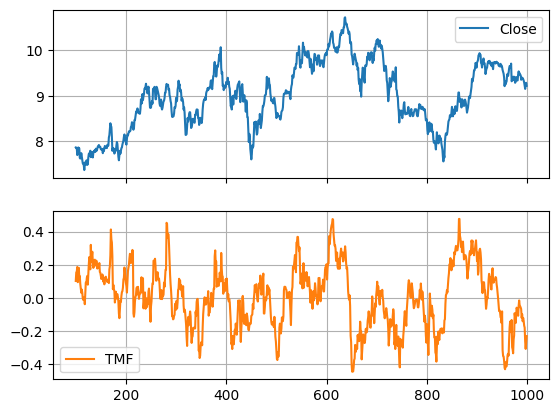

In [16]:
import pandas as pd
df = pd.read_csv("/home/sean/Projects/streambt/cba_debug.csv/part-00000-3f5f20f4-606b-42a2-a0d6-38578148d25d-c000.csv")
focus = df[['Date','Close','TMF']].iloc[100:1000]
focus.plot(grid=True,sharey=False,subplots=True)

array([<Axes: >, <Axes: >], dtype=object)

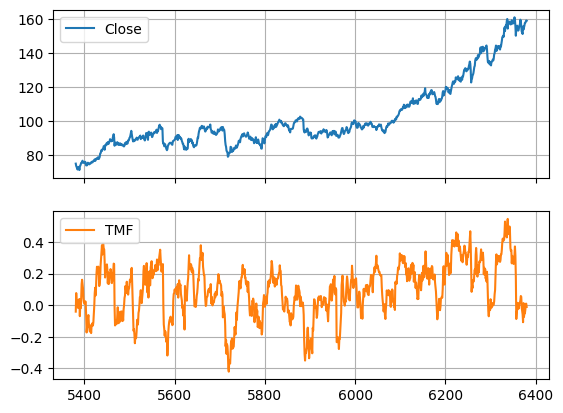

In [19]:
import pandas as pd
df = pd.read_csv("/home/sean/Projects/streambt/cba_debug.csv/part-00000-3f5f20f4-606b-42a2-a0d6-38578148d25d-c000.csv")
focus = df[['Date','Close','TMF']].iloc[-1000:]
focus.plot(grid=True,sharey=False,subplots=True)

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

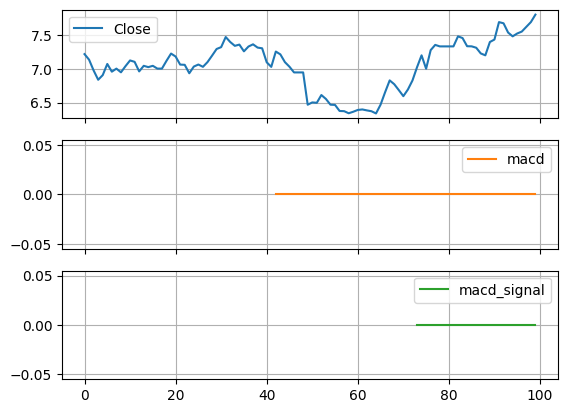

In [21]:
import pandas as pd
df = pd.read_csv("/home/sean/Projects/streambt/cba_debug.csv/part-00000-3f5f20f4-606b-42a2-a0d6-38578148d25d-c000.csv")
focus = df[['Date','Close','macd','macd_signal']].iloc[:100]
focus.plot(grid=True,sharey=False,subplots=True)